# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [285]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

# File to Load (Remember to change these)
city_data_to_load = "Resources/City_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [286]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [287]:
#  1. Get the total rides for each city type
rides_by_city = pyber_data_df.groupby('type').count().ride_id
rides_by_city


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [288]:
# 2. Get the total drivers for each city type
drivers_by_city_type = city_data_df.groupby('type').sum().driver_count
drivers_by_city_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [289]:
#  3. Get the total amount of fares for each city type
fares_by_city_type = pyber_data_df.groupby('type').sum().fare
fares_by_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [290]:
#  4. Get the average fare per ride for each city type. PyBer_analysis # 18
avg_fare_by_city_type = pyber_data_df.groupby('type').mean().fare
avg_fare_by_city_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [291]:
# 5. Get the average fare per driver for each city type. 
avg_driver_fare_by_city_type = pyber_data_df.groupby('type').sum().fare / drivers_by_city_type
avg_driver_fare_by_city_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [292]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
           "Total Rides": rides_by_city,
           "Total Drivers": drivers_by_city_type,
           "Total Fares": fares_by_city_type,
           "Average Fare per Ride" :avg_fare_by_city_type,
           "Average Fare per Driver" :avg_driver_fare_by_city_type})

         

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [293]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("${:,.2f}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("${:,.2f}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,$125.00,$78.00,"$4,327.93",$34.62,$55.49
Suburban,$625.00,$490.00,"$19,356.33",$30.97,$39.50
Urban,"$1,625.00","$2,405.00","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [294]:
# 1. Read the merged DataFrame
pyber_data_df.rename(columns = {'city': 'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'}, inplace=True)
pyber_data_df



,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/2019 17:04,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,1/30/2019 0:05,20.76,9.018730e+12,2,Rural
2372,North Jaime,2/10/2019 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,5/7/2019 19:22,44.94,4.256850e+12,4,Rural


In [295]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_data_df = pyber_data_df.set_index(['Date'])

In [296]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_infare_by_citydex()
pyber_data_df_copy = pyber_data_df.copy()[['Fare', 'City Type']]
pyber_data_df_copy

,Fare,City Type
Date,,
1/14/2019 10:14,13.83,Urban
3/4/2019 18:24,30.24,Urban
2/24/2019 4:29,33.44,Urban
2/10/2019 23:22,23.44,Urban
3/6/2019 4:28,34.58,Urban
...,...,...
4/29/2019 17:04,13.38,Rural
1/30/2019 0:05,20.76,Rural
2/10/2019 21:03,11.11,Rural


In [297]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_data_df_copy.index = pd.to_datetime(pyber_data_df_copy.index)
pyber_data_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:00 to 2019-04-25 10:20:00
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Fare       2375 non-null   float64
 1   City Type  2375 non-null   object 
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [298]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pyber_data_df_fare_by_type = pd.DataFrame(pyber_data_df_copy.groupby(['City Type', 'Date']).sum()['Fare'])
pyber_data_df_fare_by_type.reset_index()
pyber_data_df_fare_by_type

Fare
City Type Date                      
Rural     2019-01-01 09:45:00  43.69
          2019-01-02 11:18:00  52.12
          2019-01-03 19:51:00  19.90
          2019-01-04 03:31:00  24.88
          2019-01-06 07:38:00  47.33
...                              ...
Urban     2019-05-08 04:20:00  21.99
          2019-05-08 04:39:00  18.45
          2019-05-08 07:29:00  18.55
          2019-05-08 11:38:00  19.77
          2019-05-08 13:10:00  18.04

[2364 rows x 1 columns]

In [299]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
pyber_pivot = pd.pivot_table(pyber_data_df_fare_by_type, values="Fare", index=["Date"], columns=['City Type'])
pyber_pivot

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:00,NaN,NaN,18.45
2019-05-08 07:29:00,NaN,NaN,18.55


In [300]:
#7 Create a dataframe from the pivot table above
pyber_pivot_df = pyber_pivot.loc['2019-01-01':'2019-04-28']
pyber_pivot_df.tail()

City Type,Rural,Suburban,Urban
Date,,,
2019-04-28 14:28:00,NaN,NaN,11.46
2019-04-28 16:29:00,NaN,NaN,36.42
2019-04-28 17:26:00,NaN,NaN,31.43
2019-04-28 17:38:00,NaN,34.87,NaN
2019-04-28 19:35:00,NaN,16.96,NaN


In [301]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_pivot_df_weekly = pyber_pivot_df.resample('W').sum()
pyber_pivot_df_weekly

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


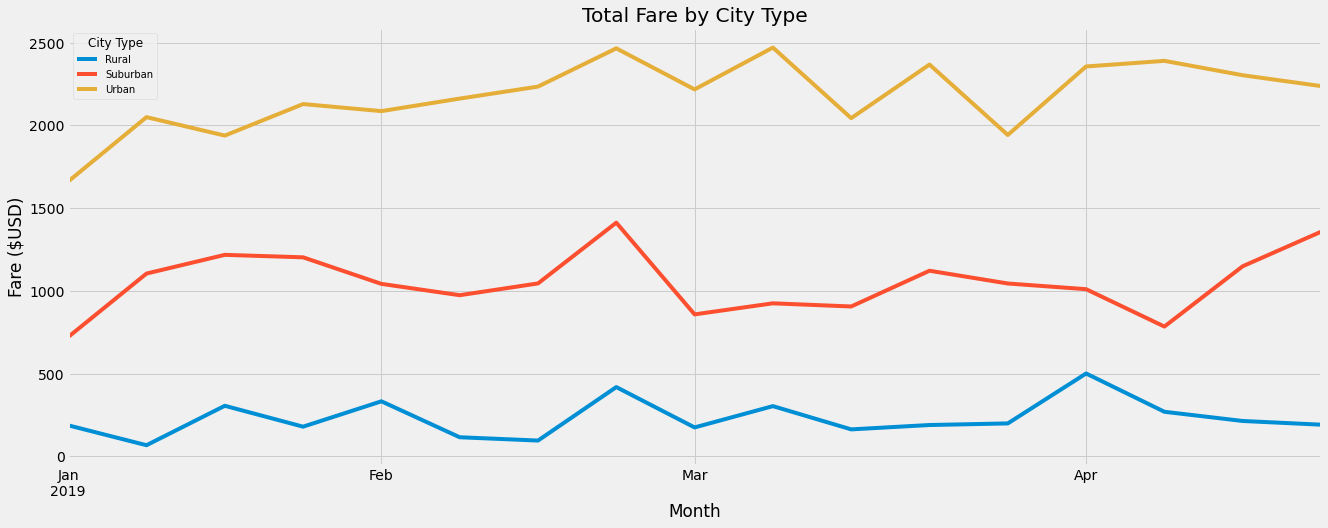

In [302]:
# 9. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
# Create a plot
ax = pyber_pivot_df_weekly.plot(figsize=(20, 7.5))
# Create titles, axis labels, and legend
ax.set_title("Total Fare by City Type")
ax.set_ylabel("Fare ($USD)")
ax.set_xlabel("Month")

#Create a Legend
lgnd = plt.legend(fontsize="10", loc = "best", title="City Type")
lgnd.get_title().set_fontsize(12)

# Save plot to analysis folder
plt.savefig("analysis/pyber_challenge.png")

plt.show()
